In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import csv
import sympy

## Индекс "Борщеца"

Для чего нужно исследование ?

Средняя стоимость продуктов в маркетах с доставкой растёт относительно всего рынка продуктов.
Чтобы не остаться без покупателей онлайн-магазины предлагают вам купить продукты оптом, поэтому за основу моего исследования мы возьмём ситуацию, когда покупатель решил приготовить кастрюлю борщеца для гостей.
Индекс борща как правило рассчитывается на семью из 4 человек, мы же с вами будем считать на 8 человек, потому как это наши реалии.
Человек существо ленивое и мы хотим доставку продуктов на дом, а не кататься на рынок в поисках свежих продуктов перед приездом гостей.
Поэтому я взял и купил продукты в разных магазинах с доставкой на дом.

Итак первое что бъёт по кошельку покупателя это

### ДОСТАВКА и МИНИМАЛЬНАЯ СУММА ЗАКАЗА.

In [2]:
df_delivery = pd.read_excel(r'C:\Users\Евген\Desktop/BORCH Москва.xlsx', sheet_name='1')
df_delivery

,Гипермаркет,Вкусвилл,Утконос,Ашан,Впрок,Окей,Метро,Азбука Вкуса
0,Минимальная сумма заказа,0.00,345.00,1500.00,1000.00,999.00,1500.00,4000.0
1,Стоимость корзины,962.98,1195.97,627.17,1044.78,1182.46,796.68,1435.8
2,Доставка в р.,0.00,0.00,199.00,99.00,99.00,0.00,299.0


Мда, "Азбука вкуса" знает как нас удивить.

Однако её нельзя выкидывать из расчётов, так как все люди иногда любят чувствовать себя "обеспеченными гражданами".
Или этот магазин ну прям рядом с вами и вы к борщу хотите ещё два тортика.

Женёк, а что там с продуктами то ? Интересно же.

## По продуктам

In [3]:
df_ingridient = pd.read_excel(r'C:\Users\Евген\Desktop/BORCH Москва.xlsx')
df_ingridient

,Ингридиенты,Вкусвилл,Утконос,Ашан,Впрок,Окей,Метро,Азбука Вкуса
0,Картофель,58.56,49.90,22.50,49.90,36.90,19.95,168.0
1,Капуста,90.20,74.85,34.49,134.73,44.40,44.90,195.0
2,Репчатый лук,29.07,29.90,17.50,19.95,29.90,22.50,24.0
3,Морковь,24.96,34.90,14.25,39.90,35.40,20.00,49.0
4,Свекла,22.96,23.92,12.50,29.90,28.40,13.45,34.0
5,Чеснок,72.00,49.90,39.99,49.90,118.90,79.90,78.0
6,Говядина,366.23,681.00,276.50,489.00,639.00,169.00,598.0
7,Лавровый лист,18.00,29.00,28.99,14.90,21.99,26.29,56.8
8,Столовый уксус 9%,46.00,57.90,39.99,57.90,46.99,194.00,67.7
9,Сметана 15%,68.00,52.90,34.99,54.90,53.90,52.90,45.0


Посчитаем сумму покупок для каждого магазина

In [4]:
df_sum = np.sum(df_ingridient)

## Сумма заказа в корзине

In [5]:
df_sum

Ингридиенты     КартофельКапустаРепчатый лукМорковьСвеклаЧесно...
Вкусвилл                                                   962.98
Утконос                                                   1195.97
Ашан                                                       627.17
Впрок                                                     1044.78
Окей                                                      1182.46
Метро                                                      796.68
Азбука Вкуса                                               1435.8
dtype: object

In [6]:
Sum_VK = 962.98
Sum_UT = 1195.97
Sum_AS = 627.17
Sum_VP = 1044.78
Sum_OK = 1182.46
Sum_MC = 796.68
Sum_AV = 1435.8

Конечная цена по продуктам представлена выше. Мы не берём за основу временную разницу в стоимости и скидки, так как все магазины могут предложить и бесплатную доставку и что-то со скидкой.Подобные акции - это просто одноразовые акции, а реальность - это реальность. 

### Даю тебе дорогой читатель больше поводов подумать в каком магазине купить продукты.

Зная стоимость продуктов в корзине, нужно помнить о минимальной доставке.

In [7]:
min_delivery_VK = 0
min_delivery_UT = 345
min_delivery_AS = 1500
min_delivery_VP = 1000
min_delivery_OK = 999
min_delivery_MC = 1500
min_delivery_AV = 4000

Нам известна минимальная стоимость заказа

In [8]:
cost_delivery_VK = 0
cost_delivery_UT = 0
cost_delivery_AS = 199
cost_delivery_VP = 99
cost_delivery_OK = 99
cost_delivery_MC = 0
cost_delivery_AV = 299

Стоимость доставки

In [9]:
total_VK = Sum_VK + cost_delivery_VK
total_UT = Sum_UT + cost_delivery_UT
total_AS = min_delivery_AS
total_VP = Sum_VP + cost_delivery_VP
total_OK = Sum_OK + cost_delivery_OK
total_MC = min_delivery_MC
total_AV = min_delivery_AV + cost_delivery_AV

### Наша итоговая стоимость кастрюли по разным магазинам.

In [10]:
print(total_VK)
print(total_UT)
print(total_AS)
print(total_VP)
print(total_OK)
print(total_MC)
print(total_AV)

962.98
1195.97
1500
1143.78
1281.46
1500
4299


### Чтобы строить какие либо выводы, мы не должны забывать и об уровне дохода населения города.
Возьмём данные по уровню доходов(к сожалению за 2019 год, это плохо знаю, но в 2022 году могу пересчитать модель, так как вообще то у нашей экономики сейчас дела ПЛОХО и данные тебе в открытых источниках мало кто даст)

Средняя зарплата по районам:
                Ленинский
                Центральный
                Волгоградский
                Волоколамский
                Дмитровский
                Варшавский
                Ленинградский
                Каширский
                Кутузовский
                Ярославский
                Щелковский
                Шоссе Энтузиастов
                Зеленоградский

In [11]:
mean_salary_Len = 52053
mean_salary_Cen = 68381
mean_salary_Vog = 41015
mean_salary_Vok = 45271
mean_salary_Dmt = 43514
mean_salary_Var = 43969
mean_salary_Lng = 49159
mean_salary_Kas = 42157
mean_salary_Kut = 48128
mean_salary_Yar = 43682
mean_salary_Shс = 43763
mean_salary_Sho = 40550
mean_salary_Zel = 38751

Вес корзины на момент оформления заказа.

In [12]:
basket_VK = 7.08
basket_UT = 8.39
basket_AS = 5.90
basket_VP = 11.07
basket_OK = 9.11
basket_MC = 7.00
basket_AV = 8.781

Ингридиенты для сума по рецепту суммарно весят 1.08. Поэтому посмотрим остаток в кг. после приготовления супа.

In [13]:
difference_basket_VK = 5.21
difference_basket_UT = 6.52
difference_basket_AS = 4.03
difference_basket_VP = 9.20
difference_basket_OK = 7.24
difference_basket_MC = 5.13
difference_basket_AV = 6.91

In [14]:
lst1 = [['Вкусвилл',962.80, difference_basket_VK], ['Утконос', 1195.97, difference_basket_UT], ['Ашан', 1699.00, difference_basket_AS], ['Впрок', 1143.78, difference_basket_VP], ['Окей', 1281.46, difference_basket_OK], ['Метро', 1500.00, difference_basket_MC], ['Азбука Вкуса', 4299.00, difference_basket_AV]]


In [15]:
market = pd.DataFrame(lst1, columns =['Name', 'Стоимость кастрюли','Остаток в кг'], dtype = float)

### Стоимость супа и остаток продуктов в кг. после приготовления 

In [16]:
market

,Name,Стоимость кастрюли,Остаток в кг
0,Вкусвилл,962.80,5.21
1,Утконос,1195.97,6.52
2,Ашан,1699.00,4.03
3,Впрок,1143.78,9.20
4,Окей,1281.46,7.24
5,Метро,1500.00,5.13
6,Азбука Вкуса,4299.00,6.91


Так как мы знаем, что индекс борща - это зарплата/стоимость кастрюли, то мы можем посчитать индекс борща по всем нашим районам Москвы.

In [17]:
lst2=[['Ленинский'	, 	54.05	, 	43.52	, 	30.64	, 	45.51	, 	40.62	, 	34.70	, 	12.11	], ['Центральный'	, 	71.01	, 	57.18	, 	40.25	, 	59.79	, 	53.36	, 	45.59	, 	15.91	], ['Волгоградский', 	42.59	, 	34.29	, 	24.14	, 	35.86	, 	32.01	, 	27.34	, 	9.54	], ['Волоколамский', 	47.01	, 	37.85	, 	26.65	, 	39.58	, 	35.33	, 	30.18	, 	10.53	], ['Дмитровский', 	45.19	, 	36.38	, 	25.61	, 	38.04	, 	33.96	, 	29.01	, 	10.12	], ['Варшавский', 	45.66	, 	36.76	, 	25.88	, 	38.44	, 	34.31	, 	29.31	, 	10.23	], ['Ленинградский', 	51.05	, 	41.10	, 	28.93	, 	42.98	, 	38.36	, 	32.77	, 	11.43	], ['Каширский', 	43.78	, 	35.25	, 	24.81	, 	36.86	, 	32.90	, 	28.10	, 	9.81	], ['Кутузовский', 	49.98	, 	40.24	, 	28.33	, 	42.08	, 	37.56	, 	32.09	, 	11.20	], ['Ярославский', 	45.36	, 	36.52	, 	25.71	, 	38.19	, 	34.09	, 	29.12	, 	10.16	], ['Щелковский', 	45.45	, 	36.59	, 	25.76	, 	38.26	, 	34.15	, 	29.18	, 	10.18	], ['Шоссе Энтузиастов', 	42.11	, 	33.91	, 	23.87	, 	35.45	, 	31.64	, 	27.03	, 	9.43	], ['Зеленоградский', 	40.24	, 	32.40	, 	22.81	, 	33.88	, 	30.24	, 	25.83	, 	9.01	]]

In [18]:
pot_borch = pd.DataFrame(lst2, columns =['Район', 'Вкусвилл', 'Утконос', 'Ашан', 'Впрок', 'Окей', 'Метро', 'Азбука Вкуса'], dtype = float)

### Создав необходимые массивы создадим таблицу для отображения результата.

In [19]:
pot_borch

,Район,Вкусвилл,Утконос,Ашан,Впрок,Окей,Метро,Азбука Вкуса
0,Ленинский,54.05,43.52,30.64,45.51,40.62,34.70,12.11
1,Центральный,71.01,57.18,40.25,59.79,53.36,45.59,15.91
2,Волгоградский,42.59,34.29,24.14,35.86,32.01,27.34,9.54
3,Волоколамский,47.01,37.85,26.65,39.58,35.33,30.18,10.53
4,Дмитровский,45.19,36.38,25.61,38.04,33.96,29.01,10.12
5,Варшавский,45.66,36.76,25.88,38.44,34.31,29.31,10.23
6,Ленинградский,51.05,41.10,28.93,42.98,38.36,32.77,11.43
7,Каширский,43.78,35.25,24.81,36.86,32.90,28.10,9.81
8,Кутузовский,49.98,40.24,28.33,42.08,37.56,32.09,11.20
9,Ярославский,45.36,36.52,25.71,38.19,34.09,29.12,10.16


Цифры цифрами, а на графике оно всё же будет понятней. Поэтому построим модель линейной регрессии, перед этим естесственно проверим есть ли связь между данными через ковариацию. В конце проверим качество модели через "Коэффициент детерминации".

Если вам не интересны превращение цифр в массивы данных, то перейдите к пункту "Зависимость признаков".

In [20]:
print(pot_borch['Вкусвилл'][0:1])
print(market['Стоимость кастрюли'][0:1])

0    54.05
Name: Вкусвилл, dtype: float64
0    962.8
Name: Стоимость кастрюли, dtype: float64


In [21]:
massiv1 = (pot_borch['Вкусвилл'])
massiv2 = (pot_borch['Утконос'])
massiv3 = (pot_borch['Ашан'])
massiv4 = (pot_borch['Впрок'])
massiv5 = (pot_borch['Окей'])
massiv6 = (pot_borch['Метро'])
massiv7 = (pot_borch['Азбука Вкуса'])

In [22]:
df1 = np.array([massiv1])
df2 = np.array([massiv2])
df3 = np.array([massiv3])
df4 = np.array([massiv4])
df5 = np.array([massiv5])
df6 = np.array([massiv6])
df7 = np.array([massiv7])

In [23]:
df1

array([[54.05, 71.01, 42.59, 47.01, 45.19, 45.66, 51.05, 43.78, 49.98,
        45.36, 45.45, 42.11, 40.24]])

In [24]:
mean_salary_Len = 52053
mean_salary_Cen = 68381
mean_salary_Vog = 41015
mean_salary_Vok = 45271
mean_salary_Dmt = 43514
mean_salary_Var = 43969
mean_salary_Lng = 49159
mean_salary_Kas = 42157
mean_salary_Kut = 48128
mean_salary_Yar = 43682
mean_salary_Shс = 43763
mean_salary_Sho = 40550
mean_salary_Zel = 38751

In [25]:
df_mean_salary = np.array([52.05, 68.38, 41.01, 45.27, 43.51, 43.96, 49.15, 42.15, 48.12, 43.68, 43.76, 40.55, 38.75])

In [26]:
df_mean_salary

array([52.05, 68.38, 41.01, 45.27, 43.51, 43.96, 49.15, 42.15, 48.12,
       43.68, 43.76, 40.55, 38.75])

In [27]:
n = 13
X = df1
Y = df_mean_salary

In [28]:
np.cov(X, Y)

array([[62.4229    , 60.11653333],
       [60.11653333, 57.8954    ]])

Функция вернула нам матрицу ковариаций. В ней по диагонали стоят вариации (т.е. дисперсии) каждой из выборок, а вне диагонали — попарные ковариации.

Чтобы окончательно убедиться, что я не тронулся и заввисимость есть определим её другим способом.

### Зависимость признаков

In [29]:
np.corrcoef(X, Y)

array([[1.        , 0.99999984],
       [0.99999984, 1.        ]])

Итак мы видим, что у нас корреляция диагональная и значения равны. А значит зависимость между нашими признаками заработной платой и индексом "борщеца" имеется.

Однако коэффициенты корреляции позволяют установить лишь само наличие и выяснить направление этой связи.
Определить, насколько сильно изменяется одна переменная под воздействием другой, он не в силах.
Эта разница математически описывается с помощью коэффициента b1. Он определяется как тангенс угла между линией "индекса борщеца" и горизонтальной оси x "заработной платы". 
Чем больше индекс борща, тем больше порций у вас будет в зависимости от уровня заработной платы.
Можно выразиться и так: при увеличении индекса борща на одну единицу заработная плата будет возрастать на b1.

In [30]:
pot_borch.describe()

,Вкусвилл,Утконос,Ашан,Впрок,Окей,Метро,Азбука Вкуса
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,47.960000,38.614615,27.183846,40.378462,36.040769,30.788462,10.743077
std,7.900816,6.362896,4.478708,6.653698,5.936821,5.073856,1.771202
min,40.240000,32.400000,22.810000,33.880000,30.240000,25.830000,9.010000
25%,43.780000,35.250000,24.810000,36.860000,32.900000,28.100000,9.810000
50%,45.450000,36.590000,25.760000,38.260000,34.150000,29.180000,10.180000
75%,49.980000,40.240000,28.330000,42.080000,37.560000,32.090000,11.200000
max,71.010000,57.180000,40.250000,59.790000,53.360000,45.590000,15.910000


Чтобы понять устраивающий нас индекс "борщеца", а не превратить исследование в битву магазинов, возьмём средние значения.

In [31]:
df_mean_pot = np.array([37.31,49.01,29.40,32.45,31.19,31.51,35.23,30.22,34.49,31.31,31.37,29.06,27.77])


In [32]:
n = 13

x = df_mean_salary
y = df_mean_pot

In [33]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

0.7166696317842162

In [34]:
a = np.mean(y) - b * np.mean(x)
a

0.005734865743356465

In [35]:
r = b * np.std(x) / np.std(y)
r

0.9999997647471951

In [36]:
R2 = r**2
R2

0.9999995294944455

In [37]:
df_mean_pot

array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.22, 34.49,
       31.31, 31.37, 29.06, 27.77])

### Проверим наши данные модели.

In [38]:
y_pred = a + b * x
y_pred

array([37.3083892 , 49.01160429, 29.39635647, 32.4493691 , 31.18803054,
       31.51053188, 35.23004727, 30.21335985, 34.49187755, 31.30986438,
       31.36719795, 29.06668843, 27.7766831 ])

In [39]:
rounded_df = y_pred.round(decimals=2)

rounded_df

array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.21, 34.49,
       31.31, 31.37, 29.07, 27.78])

In [40]:
y_pred = rounded_df

y_pred

array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.21, 34.49,
       31.31, 31.37, 29.07, 27.78])

In [41]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

0.007962485656894228

In [42]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

23379096.630906448

In [43]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 0.005222329678671133
m_a = 0.009263606933115112
m_b = 0.0001981306354160121


In [44]:
x

array([52.05, 68.38, 41.01, 45.27, 43.51, 43.96, 49.15, 42.15, 48.12,
       43.68, 43.76, 40.55, 38.75])

In [45]:
y

array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.22, 34.49,
       31.31, 31.37, 29.06, 27.77])

In [46]:
y_pred

array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.21, 34.49,
       31.31, 31.37, 29.07, 27.78])

In [47]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

(0.005734865743356465, 0.7166696317842162)

Итак, модель линейной регрессии имеет вид:
𝑦=0.005+0.71⋅𝑥,
 
т.е. с увеличением стоимости ингридиентов "Индекса борща" на 1-цу цена возрастет на 0.71 тыс.руб . 
Визуализируем полученные результаты на графике.

In [48]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

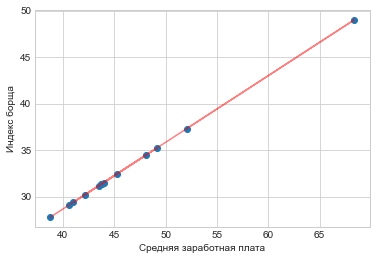

In [49]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Средняя заработная плата')
plt.ylabel('Индекс борща');

Чего-то на модели не хватает, уж слишком всё прозрачно. 
Посмотрим иначе.

Чтобы оценить модель правильно, мы должны взять индекс борща за 2021 год (102 за 4 порции, однако мы измеряем кастрюлей. ЭТО 8 ПОРЦИЙ, поэтому наш Индекс равен 51) и среднюю заработную плату по всем районам Москвы и пересмотреть данные модели.

In [50]:
n = 14

x = np.array([52.05, 68.38, 41.01, 45.27, 43.51, 43.96, 49.15, 42.15, 48.12,
       43.68, 43.76, 40.55, 38.75, 46.18])
y = np.array([37.31, 49.01, 29.4 , 32.45, 31.19, 31.51, 35.23, 30.22, 34.49,
       31.31, 31.37, 29.06, 27.77, 51.00])

In [51]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
y_pred = a + b * x
rounded_df = y_pred.round(decimals=2)
y_pred = rounded_df

A_mean = 100 * np.mean(np.abs((y - y_pred) / y))

s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

s_residual = 4.979323916624289
m_a = 8.824837088795936
m_b = 0.1889112086454784


(1.284196404204927, 0.7166696317842156)

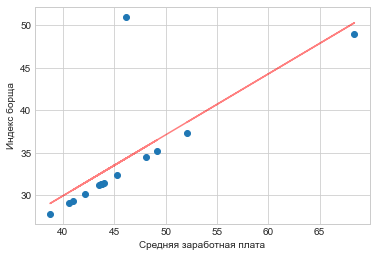

In [52]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Средняя заработная плата')
plt.ylabel('Индекс борща');

### Есть над чем подумать

Вот наша реальность.

На графике вы можете видеть насколько высока стоимость борщевого набора в маркетах относительно рыночной стоимости. 

Берём заработную плату среднюю по Москве 46 184р и делим её на индекс борща 51, чтобы понять сколько должна реально стоить касрюля борщеца (на 8 человек!). 

In [53]:
real_price = 46184 / 51
real_price

905.5686274509804

Чтобы не скролить вверх, отобразим данные по ценам ещё раз. 

In [57]:
market

,Name,Стоимость кастрюли,Остаток в кг
0,Вкусвилл,962.80,5.21
1,Утконос,1195.97,6.52
2,Ашан,1699.00,4.03
3,Впрок,1143.78,9.20
4,Окей,1281.46,7.24
5,Метро,1500.00,5.13
6,Азбука Вкуса,4299.00,6.91


Проверим нашу модель линейной регрессии на качество с помощью коэффициента детерминации

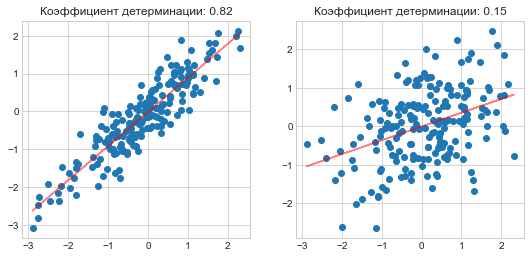

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9, 4)

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax1.scatter(x, y)
ax1.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax1.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.4], [0.4, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax2.scatter(x, y)
ax2.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax2.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

plt.show()

Коэффициент детерминации для линейной регрессии равен квадрату коэффициента корреляции.
R 2= 0.99 ** 2 = 0.98, т.е. в 82% случаев изменения х приводят к изменению y. Другими словами - точность подбора уравнения регрессии - высокая

Итоги:
1) Индекс борща штука полезная и реально мы можем смотреть и сравнивать разные данные.

2) Уровень заработной платы можно измерять в кастрюлях.

3) Каждый магазин имеет свой уровень цен и многие из них не сильно отличаются от рыночных, а значит, 
что разница "индекса борща" не отличается между тем, что ты сходишь на рынок или закажешь продукты с доставкой.
Поэтому смотрите внимательно на минимальную сумму заказа и заказывайте продукты на дом в ваших любимых магазинах.
Ведь если у вас нет рынка через дорогу, то вы затратите больше сил и усилий найти те самые продукты по той самой цене.

### Выбор за вами.
